In [17]:
# Install dependencies
import sys
!{sys.executable} -m pip install mplsoccer

In [49]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [52]:
# parameter names of the statistics we want to show
params = ["Golos Marcados ", "Golos Sofridos", "Remates/Jogo", "Remates a baliza/Jogo", "%Posse Bola",
          "Precisão do Passe%", "Dribles/Jogo", "Intercepções/Jogo", "Faltas"]

# The lower and upper boundaries for the statistics
low =  [0, 0, 0, 0, 0,  0, 0, 0, 0]
high = [4, 4, 20, 10, 100, 100, 30, 30, 20]

In [53]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [54]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [55]:
porto_values =  [8, 2, 16, 5, 65, 83, 18, 10, 13]
sporting_values = [8, 2, 15, 5, 61, 85, 24, 9, 16]

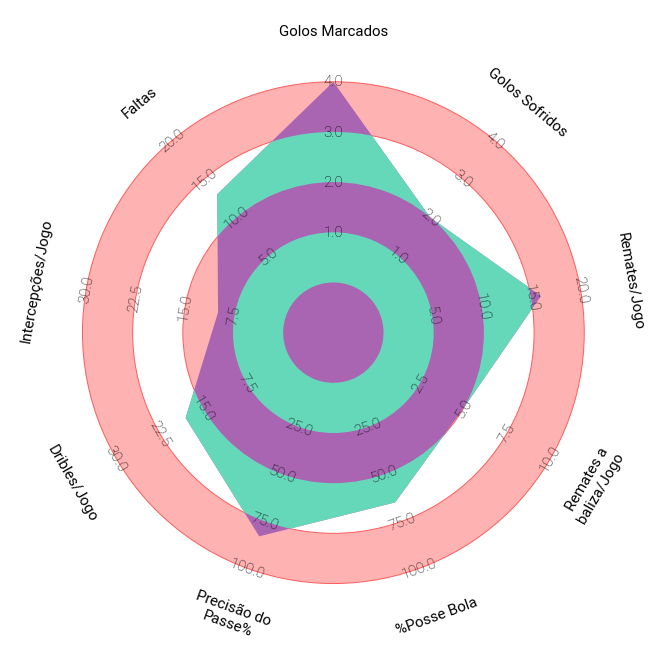

In [56]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(porto_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

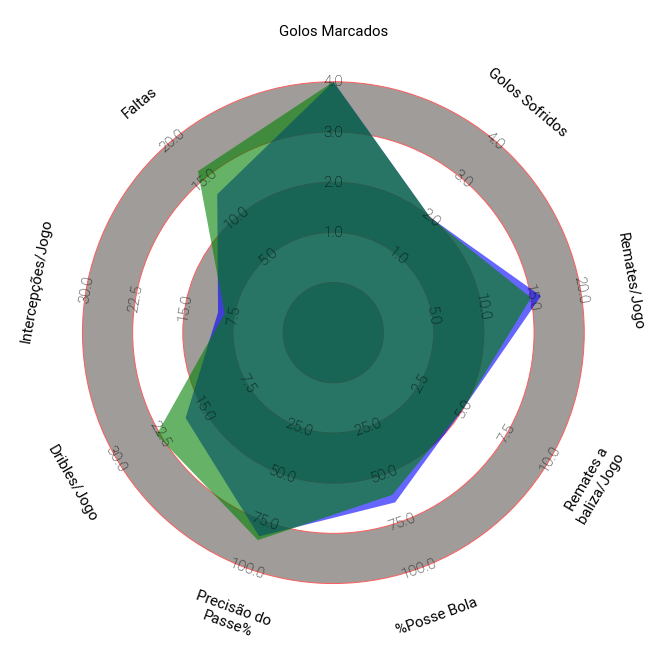

In [57]:
# plot radar
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#A09C99', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(porto_values, sporting_values, ax=ax,
                                        kwargs_radar={'facecolor': 'blue', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': 'green', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)

In [58]:
def radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14):
    """ Create a Radar chart flanked by a title and endnote axes.

    Parameters
    ----------
    radar_height: float, default 0.915
        The height of the radar axes in fractions of the figure height (default 91.5%).
    title_height: float, default 0.06
        The height of the title axes in fractions of the figure height (default 6%).
    figheight: float, default 14
        The figure height in inches.

    Returns
    -------
    fig : matplotlib.figure.Figure
    axs : dict[label, Axes]
    """
    if title_height + radar_height > 1:
        error_msg = 'Reduce one of the radar_height or title_height so the total is ≤ 1.'
        raise ValueError(error_msg)
    endnote_height = 1 - title_height - radar_height
    figwidth = figheight * radar_height
    figure, axes = plt.subplot_mosaic([['title'], ['radar'], ['endnote']],
                                      gridspec_kw={'height_ratios': [title_height, radar_height,
                                                                     endnote_height],
                                                   # the grid takes up the whole of the figure 0-1
                                                   'bottom': 0, 'left': 0, 'top': 1,
                                                   'right': 1, 'hspace': 0},
                                      figsize=(figwidth, figheight))
    axes['title'].axis('off')
    axes['endnote'].axis('off')
    return figure, axes

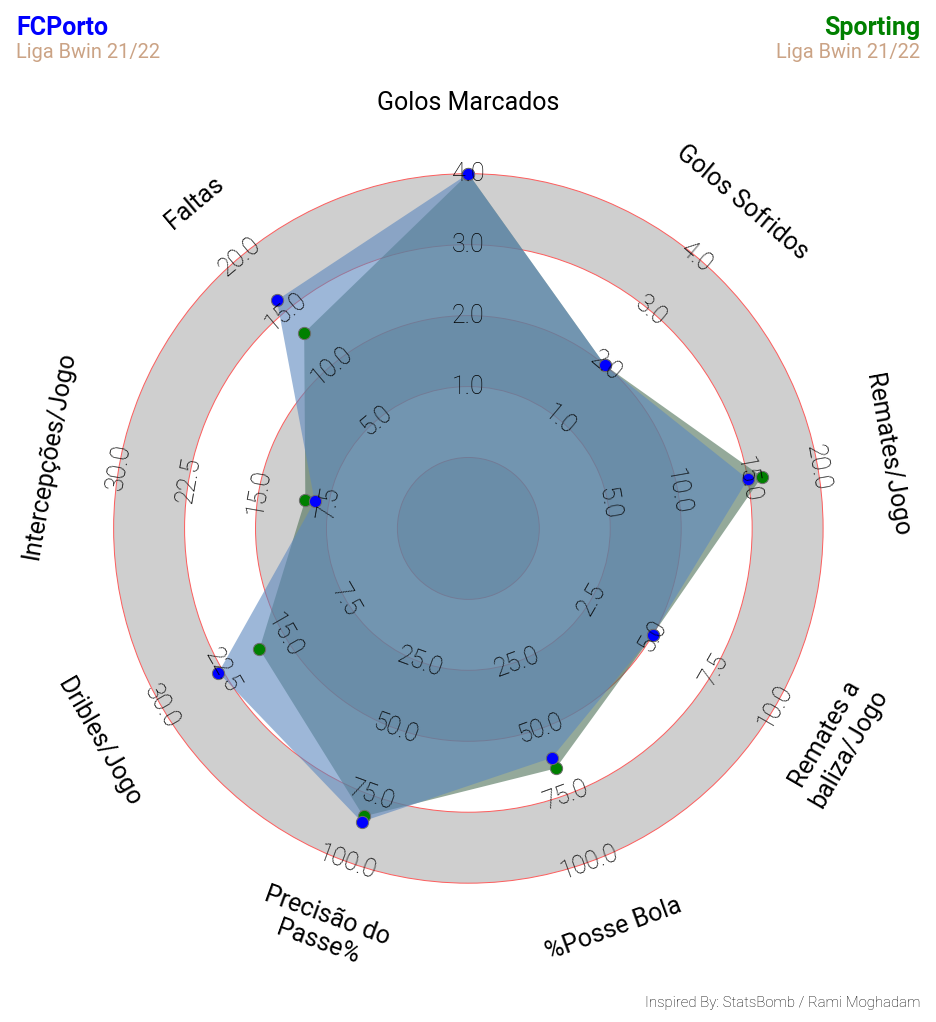

In [68]:
# creating the figure using the function defined above:
fig, axs = radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#CFCFCF', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(porto_values, sporting_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#4D7157', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#5C88BF', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_regular.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='green', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='blue', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'FCPorto', fontsize=25, color='blue',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liga Bwin 21/22', fontsize=20,
                                fontproperties=robotto_regular.prop,
                                ha='left', va='center', color='#CBA385')
title3_text = axs['title'].text(0.99, 0.65, 'Sporting', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='green')
title4_text = axs['title'].text(0.99, 0.25, 'Liga Bwin 21/22', fontsize=20,
                                fontproperties=robotto_regular.prop,
                                ha='right', va='center', color='#CBA385')
plt.savefig('FcPortoSporting.jpg', dpi=300, bbox_inches='tight')